In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../output/delito-por-zona.csv")

In [3]:
df

,TipoDelito,Centro,Norte,Sur
0,Accidente Vehicular,17.0,50.0,45.0
1,Agresión,2.0,38.0,37.0
2,Drogas,1.0,0.0,0.0
3,Extorsión,1.0,3.0,2.0
4,Fraude,0.0,3.0,1.0
5,Homicidio,2.0,59.0,32.0
6,Incendio,1.0,7.0,3.0
7,Robo,29.0,100.0,97.0
8,Secuestro,0.0,1.0,3.0
9,Vandalismo,2.0,9.0,5.0


In [4]:
X = df.iloc[:,1:]

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(X)

StandardScaler()

In [7]:
X_norm = sc.transform(X)

In [8]:
X_norm

array([[ 1.25288983,  0.71721077,  0.75793673],
       [-0.3813143 ,  0.34301385,  0.48844811],
       [-0.49026124, -0.84194308, -0.75793673],
       [-0.49026124, -0.74839385, -0.69056458],
       [-0.59920818, -0.74839385, -0.72425065],
       [-0.3813143 ,  0.99785846,  0.32001773],
       [-0.49026124, -0.62366154, -0.6568785 ],
       [ 2.56025314,  2.27636462,  2.50961272],
       [-0.59920818, -0.81076   , -0.6568785 ],
       [-0.3813143 , -0.56129538, -0.58950634]])

In [9]:
X_norm.shape

(10, 3)

In [10]:
clusters = np.arange(1,10,2)

In [11]:
clusters

array([1, 3, 5, 7, 9])

In [12]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [13]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

In [14]:
eva

,K,inercia
0,1,30.000000
1,3,2.204056
2,5,0.110183
3,7,0.021008
4,9,0.004214


<Axes: xlabel='K', ylabel='inercia'>

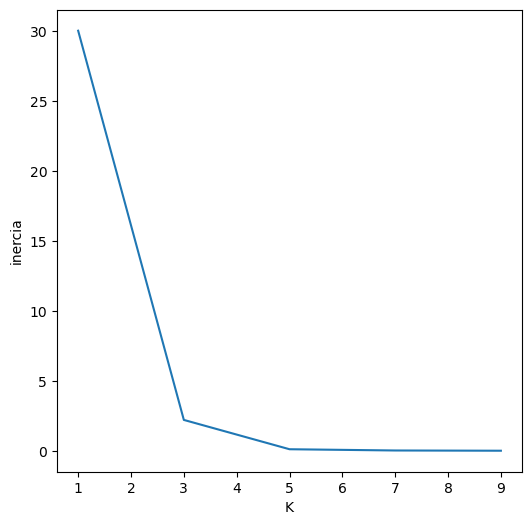

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(data = eva, x = "K", y = "inercia")

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [17]:
kmeans.fit(X_norm)

C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [18]:
kmeans.cluster_centers_

array([[ 0.16342041,  0.68602769,  0.52213419],
       [ 2.56025314,  2.27636462,  2.50961272],
       [-0.50841906, -0.72240795, -0.67933588]])

In [19]:
df["cluster"] = kmeans.labels_

In [20]:
df.columns

Index(['TipoDelito', 'Centro', 'Norte', 'Sur', 'cluster'], dtype='object')

In [21]:
df[['Centro', 'Norte', 'Sur']] = df[['Centro', 'Norte', 'Sur']].astype(int)

In [22]:
df.sort_values(by='cluster')

,TipoDelito,Centro,Norte,Sur,cluster
0,Accidente Vehicular,17,50,45,0
1,Agresión,2,38,37,0
5,Homicidio,2,59,32,0
7,Robo,29,100,97,1
2,Drogas,1,0,0,2
3,Extorsión,1,3,2,2
4,Fraude,0,3,1,2
6,Incendio,1,7,3,2
8,Secuestro,0,1,3,2
9,Vandalismo,2,9,5,2


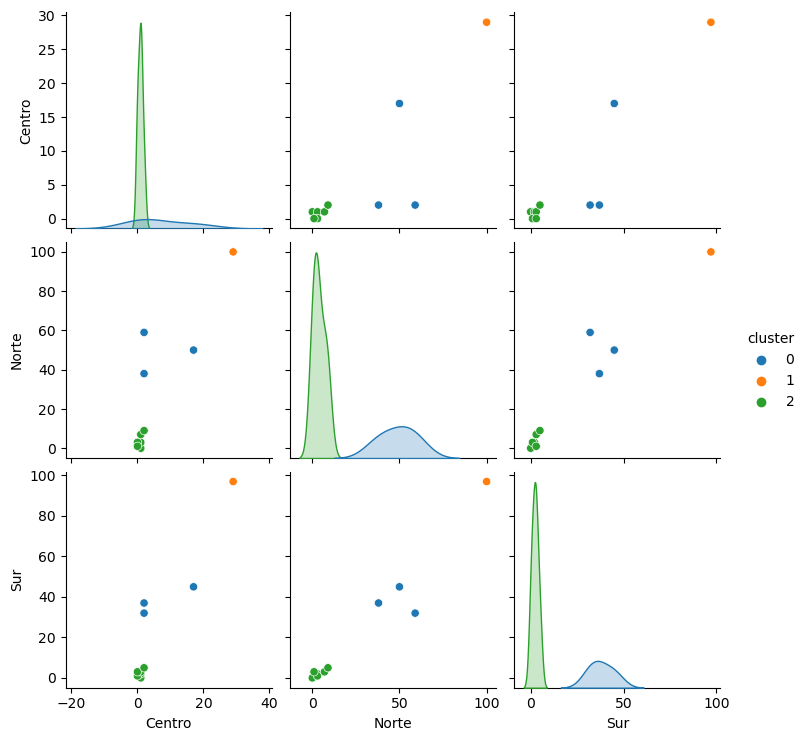

In [23]:
sns.pairplot(df,hue="cluster", palette="tab10")

In [24]:
df.loc[df["cluster"]==0]

,TipoDelito,Centro,Norte,Sur,cluster
0,Accidente Vehicular,17,50,45,0
1,Agresión,2,38,37,0
5,Homicidio,2,59,32,0


In [25]:
df.loc[df["cluster"]==1]

,TipoDelito,Centro,Norte,Sur,cluster
7,Robo,29,100,97,1


In [26]:
df.loc[df["cluster"]==2]

,TipoDelito,Centro,Norte,Sur,cluster
2,Drogas,1,0,0,2
3,Extorsión,1,3,2,2
4,Fraude,0,3,1,2
6,Incendio,1,7,3,2
8,Secuestro,0,1,3,2
9,Vandalismo,2,9,5,2


In [27]:
df.loc[df["cluster"]==3]

,TipoDelito,Centro,Norte,Sur,cluster


In [28]:
df.loc[df["cluster"]==2]

,TipoDelito,Centro,Norte,Sur,cluster
2,Drogas,1,0,0,2
3,Extorsión,1,3,2,2
4,Fraude,0,3,1,2
6,Incendio,1,7,3,2
8,Secuestro,0,1,3,2
9,Vandalismo,2,9,5,2


<Axes: xlabel='cluster', ylabel='Norte'>

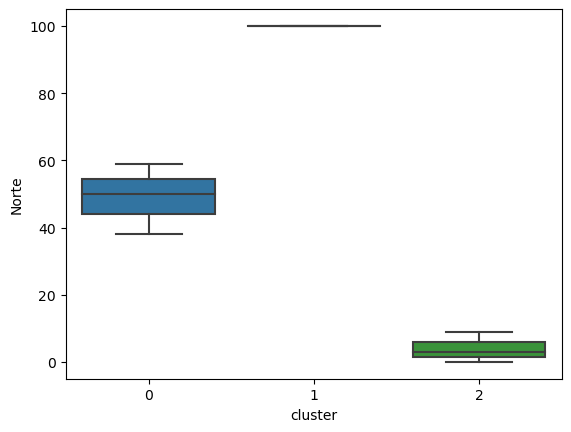

In [29]:
sns.boxplot(x="cluster", y="Norte", data=df)

In [30]:
df

,TipoDelito,Centro,Norte,Sur,cluster
0,Accidente Vehicular,17,50,45,0
1,Agresión,2,38,37,0
2,Drogas,1,0,0,2
3,Extorsión,1,3,2,2
4,Fraude,0,3,1,2
5,Homicidio,2,59,32,0
6,Incendio,1,7,3,2
7,Robo,29,100,97,1
8,Secuestro,0,1,3,2
9,Vandalismo,2,9,5,2
